In [1]:
# import libraries for a linear regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the dataset

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
# load the data
housing = fetch_california_housing()

In [4]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
## check the description of the data
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
## check the targt and data
print(housing.target)
print(housing.data)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]
[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


## Preparing the Dataset

In [7]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
df['Price'] = housing.target

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
# summarizing the stats of the data
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [12]:
# check the missing values
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

## Exploratory Data Analysis

In [13]:
# check the correlation
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [14]:
# visualize the correlation with pairplot
# sns.pairplot(df)

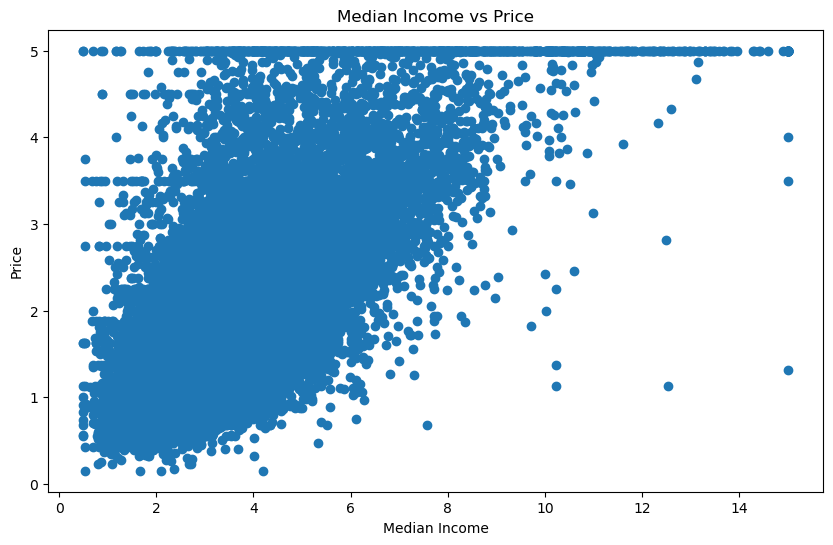

In [15]:
# scatter plot of the data
plt.figure(figsize=(10,6))
plt.scatter(df['MedInc'], df['Price'])
plt.xlabel('Median Income')
plt.ylabel('Price')
plt.title('Median Income vs Price')
plt.show()

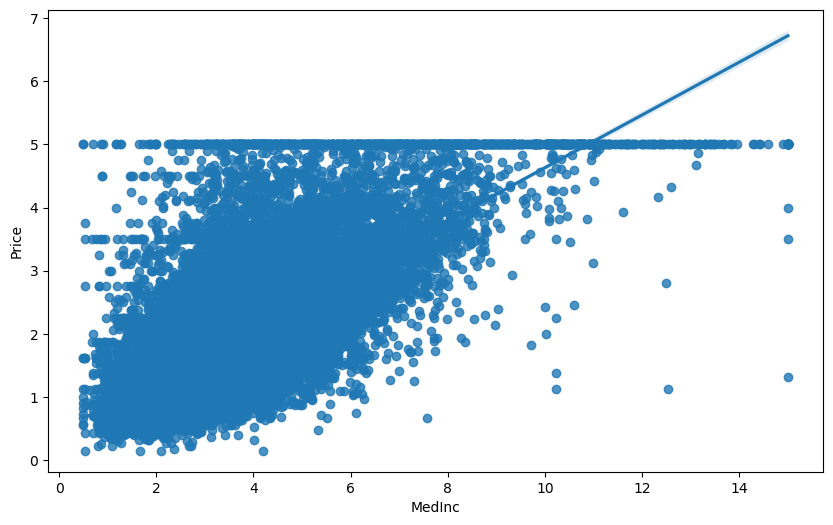

In [16]:
# regplot of the data
plt.figure(figsize=(10,6))
sns.regplot(x='MedInc', y='Price', data=df)
plt.show()

In [17]:
# check the distribution of the data
#sns.plot(df['Price'])

## Data Preparation

In [18]:
# independent and dependent features  
X = df.drop('Price', axis=1)
y = df['Price']

In [19]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
# standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building and Training

In [22]:
# import random forest regressor
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100, random_state=101, min_samples_leaf= 5) # n_estimators is the number of trees in the forest and min_samples_leaf is the minimum number of samples required to be at a leaf node 

In [23]:
reg.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=5, random_state=101)

In [24]:
## on which parameters the model {LinearRegression(parameters)} has been trained?
# print(reg.n_features_in_)
print(reg.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 101, 'verbose': 0, 'warm_start': False}


## Predictions

In [25]:
# predictions on test data
y_pred = reg.predict(X_test)

In [26]:
y_pred

array([3.86269306, 4.97096804, 1.37375576, ..., 1.09339303, 0.62463558,
       2.43424466])

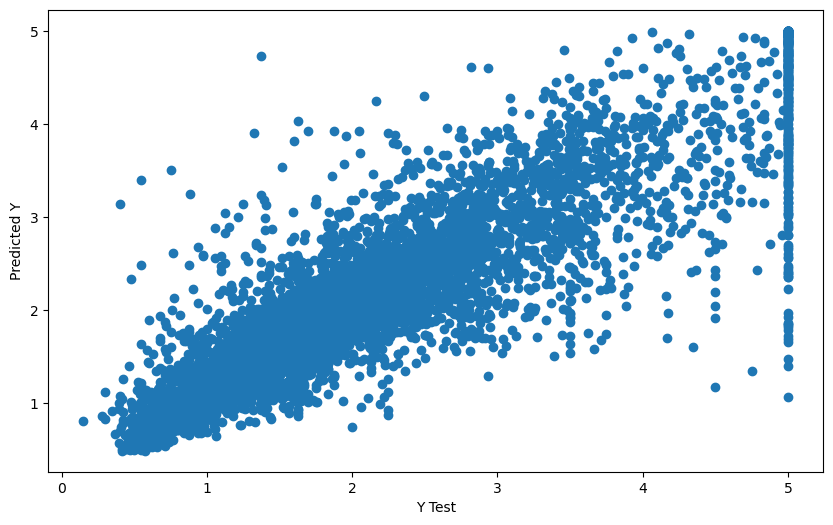

In [27]:
# plot the scatter plot of the predictions
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [28]:
# residuals (means the difference between the actual and predicted values)
residuals = y_test - y_pred
residuals

16086    0.199307
8816     0.029042
7175    -0.144756
16714    0.273636
14491    0.252950
           ...   
1263     0.285259
12815    0.987188
12139    0.269607
16208   -0.016636
571     -0.124245
Name: Price, Length: 6192, dtype: float64

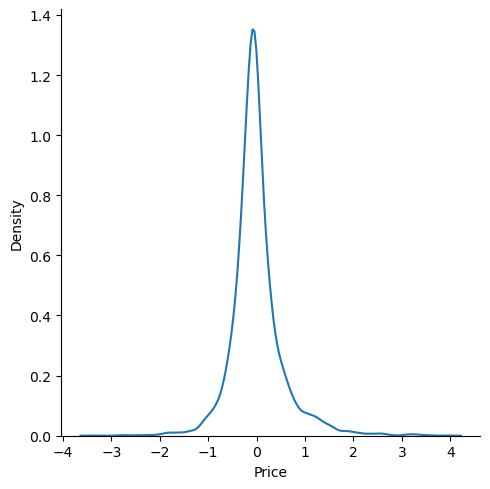

In [29]:
# plot the histogram of the residuals
sns.displot(residuals, kind= 'kde')

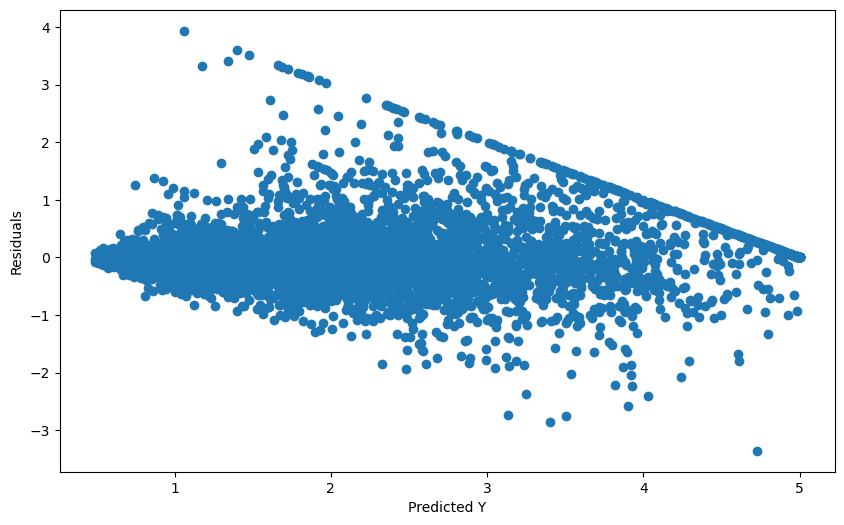

In [30]:
# scatterplot with respect to the residuals and predictions
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Y')
plt.ylabel('Residuals')
plt.show()

## Metrics and Evaluation the Model Performance

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [32]:
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE:  0.3471492720141691
MSE:  0.2887099882222593
RMSE:  0.5373173998878682


In [33]:
# R Squared and Adjusted R Squared
from sklearn.metrics import r2_score

Formulae of R squared an Adjusted R squared are

$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$
where $SS_{res}$ is the sum of squared residuals and $SS_{tot}$ is the total sum of squares.  

The adjusted R squared is defined as 

$$R^2_{adj} = 1 - \frac{1 - R^2}{n - p - 1}$$

where n is the number of observations and p is the number of predictors.


In [34]:
print('R Squared: ', r2_score(y_test, y_pred))
print('Adjusted R Squared: ', 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

R Squared:  0.7866521286208448
Adjusted R Squared:  0.7863760841487385


## Prediction on New Data

In [35]:
# checking the shape of housing data
housing.data[0].shape

(8,)

In [36]:
# reshaping the data
housing.data[0].reshape(1, -1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [37]:
# Dont forget to scale the new data before predictions, else you will get ecccentric results like -ve etc.
housing1 = scaler.transform(housing.data[0].reshape(1, -1))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [38]:
# predict on the new data
reg.predict(housing1)

array([4.34428798])

In [39]:
# check the actual value
housing.target[0]

4.526

In [40]:
# predict on new data points outside the housing dataset (not in the dataset) with same dimensions
new_data_points = np.array([[8.3252, 41.0, 6.984126984126984, 1.0238095238095237, 322.0, 2.555555555555, 37.88, 38.5 ]])
new_data_points.shape

(1, 8)

In [41]:
# predict on the new data
reg.predict(scaler.transform(new_data_points))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([4.22890653])

# Pickling the model for deployment

In [42]:
from joblib import dump, load
dump(reg, 'model.joblib') 

['model.joblib']